In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

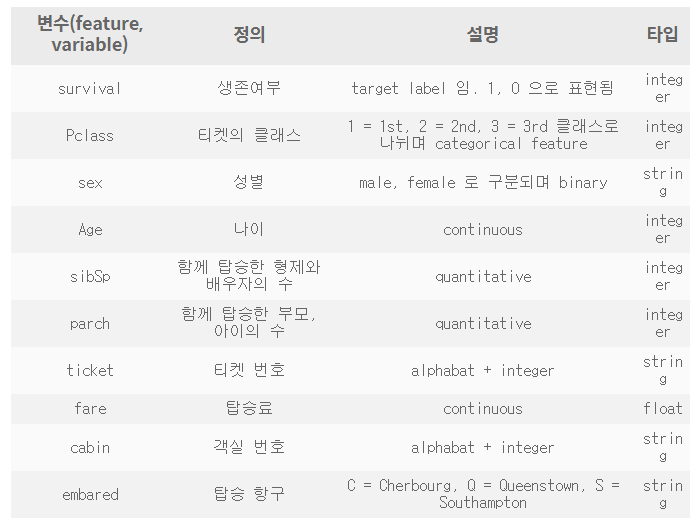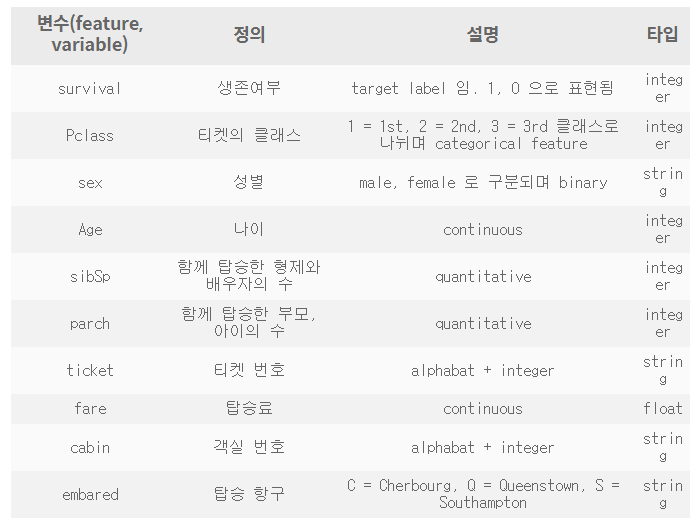

타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다. 1912년 4월 15일 처녀 항해 중 타이타닉호는 빙산과 충돌하여 침몰하여 2224명의 승객과 승무원 중 1502명이 사망했습니다. 그래서 이름이 DieTanic입니다. 이것은 세계 어느 누구도 잊을 수 없는 매우 잊을 수 없는 재난입니다.

타이타닉을 만드는 데 약 750만 달러가 들었고 충돌로 인해 바다에 가라앉았습니다. Titanic Dataset은 초보자가 데이터 과학 여행을 시작하고 Kaggle 대회에 참가할 수 있는 매우 좋은 데이터 세트입니다.

이 노트북의 목적은 예측 모델링 문제의 워크플로가 어떤 것인지 아이디어를 제공하는 것입니다. 기능을 확인하는 방법, 새로운 기능 및 일부 기계 학습 개념을 추가하는 방법. 나는 초보자도 모든 단계를 이해할 수 있도록 노트북을 가능한 한 기본적으로 유지하려고 노력했습니다.

# Contents of the Notebook 노트북의 내용:
## Part1: Exploratory Data Analysis(EDA)/1부: 탐색적 데이터 분석(EDA):
1) feature 분석.

2) feature들을 고려하여 관계나 추세 찾기.

## Part2: Feature Engineering and Data Cleaning/2부: feature engineering & 데이터 전처리:
1) 몇 가지 feature 추가.

2) 중복 feature 제거.

3) 모델링에 적합한 형태로 feature 변환.

## Part3: Predictive Modeling/3부: 예측 모델링
1) 기본 알고리즘 실행.

2) cross validation.

3) Ensembling.

4) 중요 feature 추출.

## part 1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('~/aiffel/kaggle_practice/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked에 눌 값 존재 확인

얼마나 많이 생존했는지 확인해보자

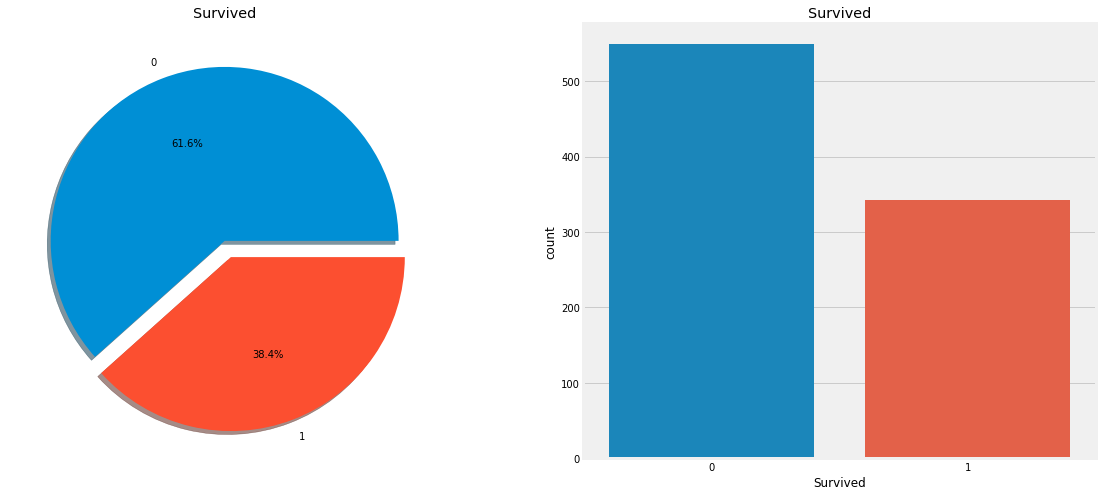

In [6]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
#value_counts(): 컬럼이나 시리즈의 유니크 밸류들의 수를 세어주는 함수
# 여기서는 survived 컬럼의 0, 1값들의 개수를 세어줌. 0, 1 말고 2도 있었다면 2의 개수도 세어서 pie plot으로 나타내졌을 것.
#Pie: 원 그래프
#explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도 [0, 1]에서, 0은 가만히 있고, 1만 중심에서 10% 벗어나서 나오게 한다.
#autopct: 부채꼴 안에 표시될 숫자의 형식
#shadow를 True로 설정하면, 파이 차트에 그림자가 표시된다.
#1.1f: 소수점 첫째 자리로 반올림
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')


sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

사고에서 생존한 사람이 38.4%밖에 되지 않는다.

생존에 관련한 데이터들의 상관관계를 알아보려면 데이터를 자세히 살펴봐야한다.

데이터 세트의 다양한 기능을 사용하여 생존율을 확인하려고 한다. 일부 피쳐는 성별Sex, 탑승구Embarked, 연령Age 등이다.

먼저 다양한 유형의 feature를 이해해보자

## Types Of Features
### Categorical Features:

범주형categorical 변수는 두 개 이상의 범주category가 있는 변수로 해당 기능의 각 값을 범주별로 분류할 수 있다. 예를 들어, 성별은 두 개의 범주(남성과 여성)가 있는 범주형 변수이다. 이런 변수는 정렬할 수 없다(오름차순/내림차순 등). Nominal Variables명목변수라고도 다.

데이터세트의 범주적 feature(Categorical Features in the dataset): SEX, Embarked.

### Ordinal Features:

순서형 변수는 범주형 값과 유사하지만 그 차이점은 값 사이에 상대적인 순서를 지정하거나 정렬할 수 있다는 것이다. 예를 들어 높이, 중간, 짧은 값을 가진 높이와 같은 기능이 있는 경우 높이는 순서형 변수이다. 정렬이 가능하다.

데이터세트의 순서형(Ordinal) feature: PClass

### Continous Feature:

feature 열의 두 점 사이 또는 최소값 또는 최대값 사이의 값을 취할 수 있는 경우 특성이 연속적이라고 합니다.

데이터 세트의 연속 기능: Age

## Analysing The Features

## Sex--> Categorical Feature

In [7]:
#groupby로 Sex, Survived를 각각 묶어주고, survived의 수를 세어준다.
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

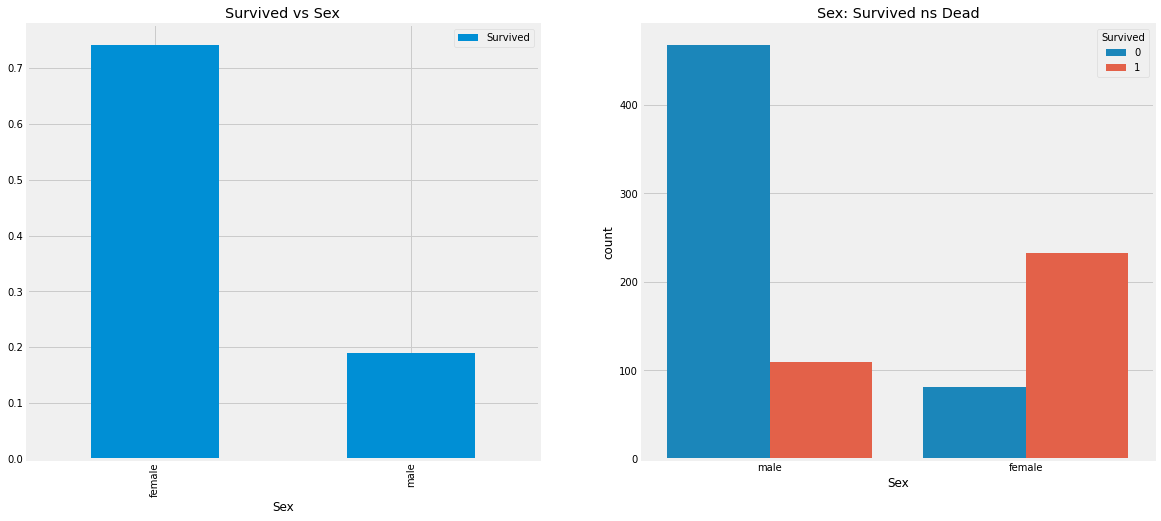

In [8]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

#데이터중 'Sex', 'Survived' 컬럼을 가져와 'Sex' 컬럼으로 묶어서 인덱스처럼 두고, 
#'Sex'에 해당하는 survived 값을 평균내어 생존률을 구한 것을 막대그래프로 나타낸다.
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived ns Dead')
plt.show()

배에 타고 있는 남자 수가 여자 수보다 훨씬 많은데 생존한 여성의 수는 남성보다 거의 두 배이다. 배에 탑승한 여성의 생존율은 약 75%인 반면 남성은 약 18-19%이다.

이것은 모델링에 매우 중요한 feature로 보인다. 하지만 이게 제일 중요한지는 아직까지 모른다. 그러니 다른 feature를 확인해 보자.

## Pclass --> Ordinal Feature

In [9]:
#crosstab(index자리, 컬럼자리)
#margins = True : 총 합을 보고 싶을 때 사용
# .style.background_gradient:그라데이션 스타일로 배경 색상을 지정
#cmap = 'summer_r' : 색 지정
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


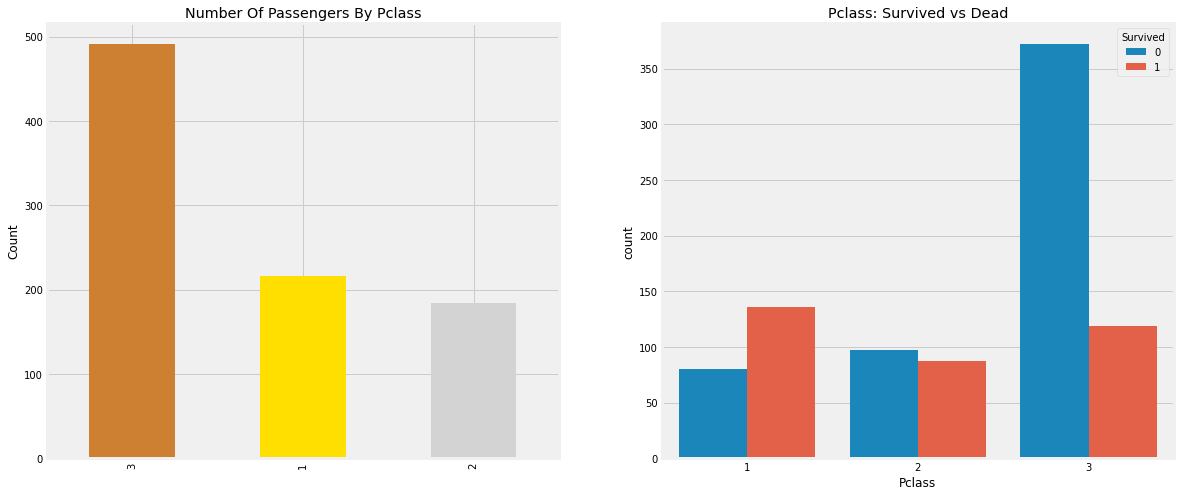

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

**subplot() takes 1 or 3 positional arguments but 2 were given 이 에러 뜨면 subplots인지 subplot인지 확인하자...**

Pclass 3의 탑승자 수가 훨씬 더 많았음에도 불구하고 생존률은 25% 정도로 매우 낮았고, Pclass 1의 승객들의 생존률이 높다는 것을 알 수 있다.

사망률보다 생존률이 높은 건 Pclass 1이 유일하다.

'Sex' 과 'Pclass' 를 같이 보며 생존율을 확인해보도록 하자.

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap='summer_r')

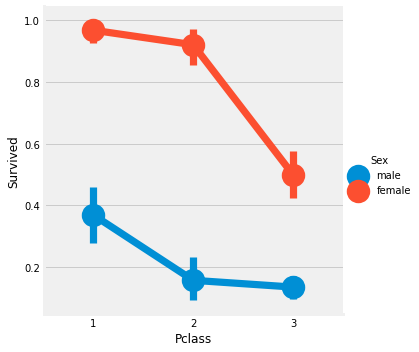

In [12]:
#카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름을 지정하여, 
#카테고리 값에 따라 색상을 다르게 할 수 있다.
#여기선 성별에 hue값을 줘서, 남자냐 여자냐에 따라 색을 다르게 설정함
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

위 그림처럼 'Sex'의 두 카테고리를 쉽게 분리할 수 있기 때문에 FactorPlot(or pointplot)을 사용한다.


크로스탭과 팩터플롯을 보면 Pclass1 여성 94명 중 3명만 사망해 Pclass1 여성 생존율이 약 95~96%임을 쉽게 추론할 수 있다.

팩터플롯을 보면 Pclass에 관계없이 여성의 구조 우선순위가 높다는 것을 알 수있다.
Pclass1의 생존률을 50%가 넘는데도 불구하고 Pclass1의 남성들의 생존율이 낮다.

Pclass도 중요한 feature인 것 같다. 다른 feature들도 분석해보자.

## Age--> Continous Feature

In [13]:
print('Oldest Passenger was of: ', data['Age'].max(), 'Years')
print('Youngest Passenger was of: ', data['Age'].min(), 'Years')
print('Average Age on the ship: ', data['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


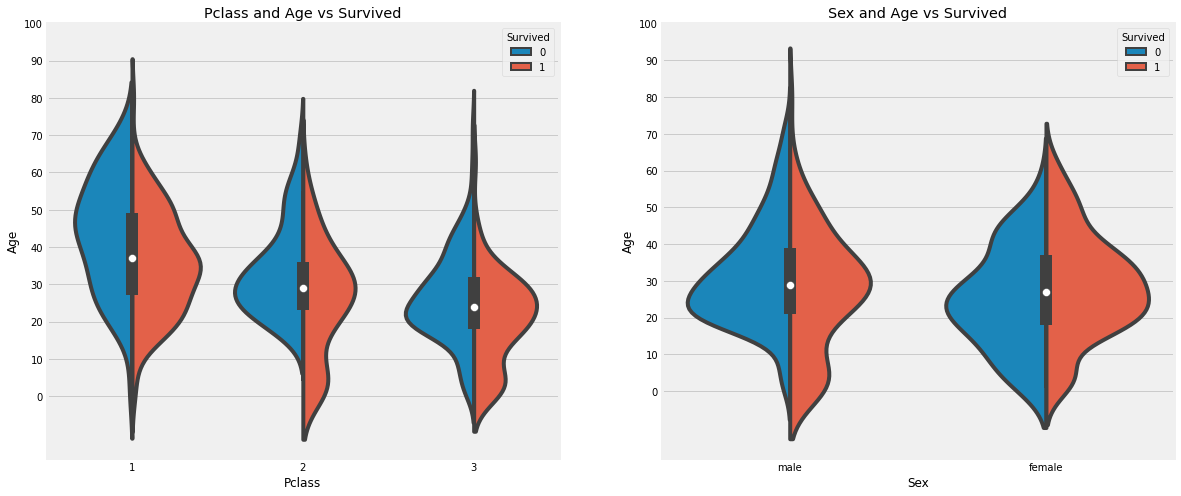

In [14]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

#split을 True로 설정하면 각 레벨에 대해 바이올린 반으로 나뉨
sns.violinplot('Pclass', 'Age', hue = 'Survived', data=data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
#set_yticks: y 축의 눈금 위치를 설정합니다.
#y축의 단위 (최소,최대,단위) 0부터 110까지 10씩 증가할 때마다 눈금 긋는데 range니까 110 전단계인 100까지만 있는것
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data=data, split = True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

관측치:

* Pclass1의 20-50세 승객들의 생존 가능성은 높으며 여성의 경우에는 더 높다.
* 왼쪽 그림은 Pclass 별로 age의 distribution이 어떻게 다른지를 생존 여부에 따라 구분한 그래프이다.
* 오른쪽 그림은 Sex별로 age의 disrtibution 이 어떻게 다른지를 생존 여부에 따라 보여주는 그래프이다.
* 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 볼 수 있다.
* 어린이의 수는 Pclass에 따라 증가하며, 10세 이하의 어린이(즉, 어린이)의 생존율은 Pclass에 관계없이 양호한 것으로 보인다.
* 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한 것을 볼 수 있다. 
-> 여성과 아이를 먼저 챙긴 것이다. -> 남성의 경우 나이가 들 수록 생존 가능성이 줄어든다.


앞에서 살펴본 것처럼 Age feature에는 177개의 null 값이 있다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 Age(29)를 사용할 수 있다.

하지만 문제는 많은 다양한 연령대의 사람들이 있다는 것이다. 4살짜리를 29살짜리로 배정할 수는 없다. 승객이 거짓말을 하는 연령대를 알 수 있는 방법이 있을까?

'Name' feature를 확인할 수 있다. Mr.과 Mrs. 등의 나이 평균값을 각각의 그룹에 할당할 수 있다.

''이름에 뭐가 있죠?''---> feature
''What's In A Name??''---> Feature

In [15]:
#dataframe에 Initial이라는 컬럼을 추가하는데 일단 처음 만들면 안에 아무 것도 없으니까 0으로 초기값 주기
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations
#str: data를 string으로 바꿔준다
#extract: 정규표현식을 적용하게 해준다.
#([A-Za-z]+)\. : 대문자, 소문자 알파벳만으로 구성된 한 개 이상의 문자에다가 '.' 붙는 애들을 가져온다

위의 코드로 Name에서 이니셜(미스터 등)을 성공적으로 추출했다.

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')
#checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Miss라고 적혔어야 했는데 Mlle이나 Mme처럼 철자가 틀린 이니셜이 있다. 

그것들을 Miss로 바꿀것이다.

In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Filling NaN Ages

In [19]:
# Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] =46

In [20]:
data.Age.isnull().any() #null 값이 어디에든지 존재하는지? 존재하면 트루, 존재하지 않으면 false

False

눌 값 없이 빈칸에 지정한 나이가 잘 들어간 것을 false로 확인할 수 있다.

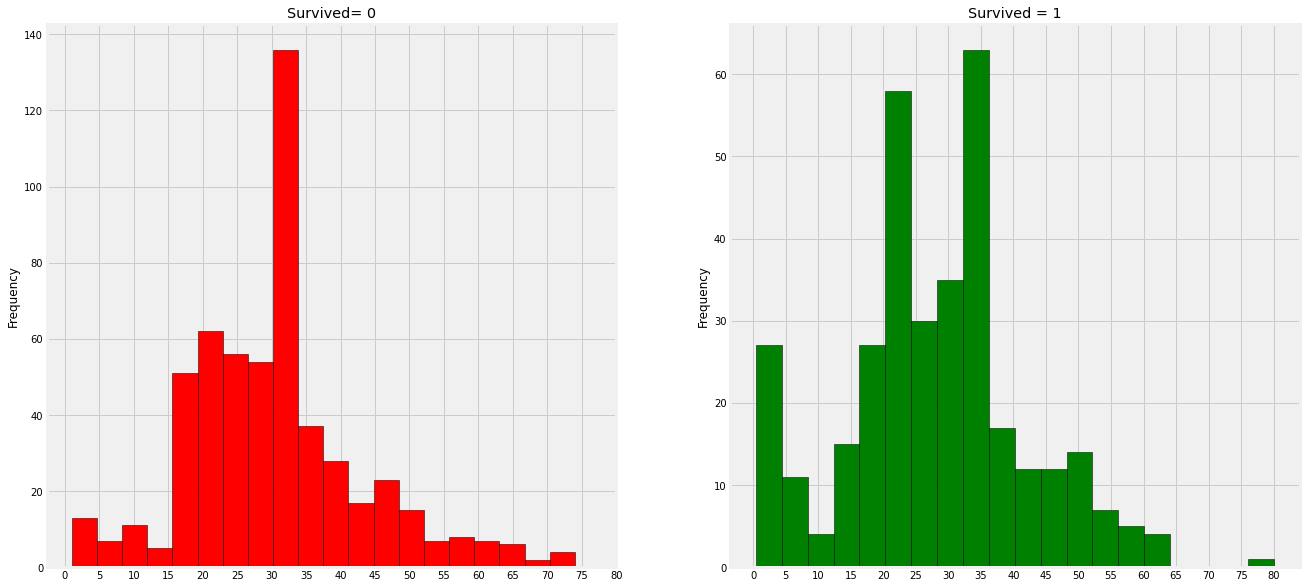

In [21]:
f, ax = plt.subplots(1, 2, figsize= (20, 10))
#데이터프레임의 survived 컬럼에서, 0값만 가지는 데이터들을 가져와 히스토그램을 그려주자
#색 지정은 적혀있는대로 하고, 20개 구간으로 나눠서 막대가 20개가 세워질 수 있게 하자
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived= 0')
#x축에 적어줄 숫자는 0부터 85까지 5단위로 커질때마다 적어주는데, range니까 마지막 숫자인 85는 빼자
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color = 'green', bins=20, edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

관측치:

1)5세의 유아들은 많이 구조되었다.

2)최고령 승객은 구조되었다(80세).

3)사망자가 많이 나온 연령대는 30-40세였다.

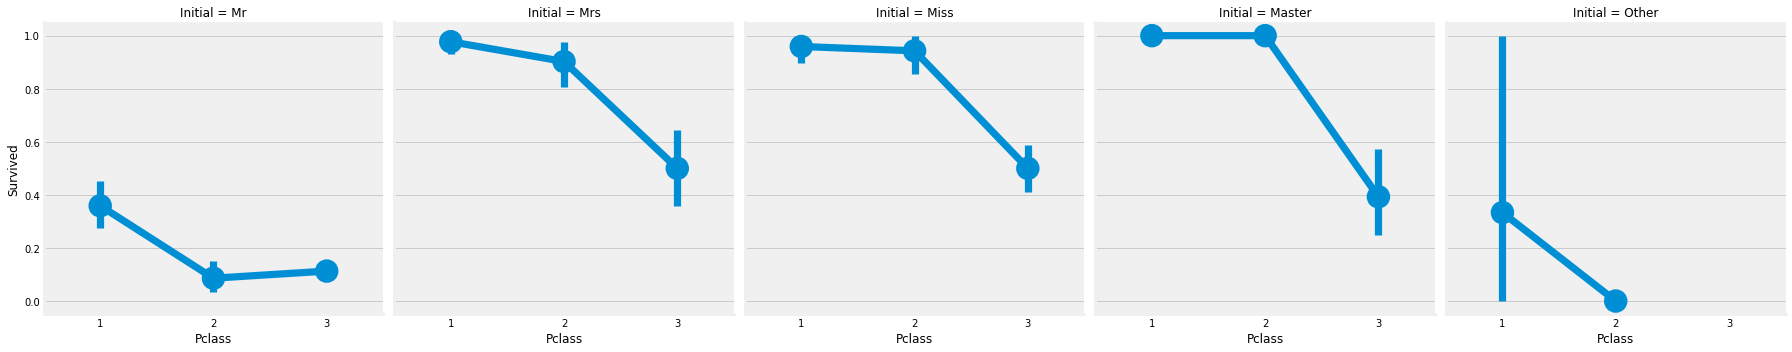

In [22]:
#각 이니셜(미스터, 미스 등)에 대한 Pclass-Survived 팩터플롯
sns.factorplot('Pclass', 'Survived', col = 'Initial', data=data)
plt.show()

여성과 아동은 Pclass와 관계 없이 우선적으로 구출 되었다는 것을 알 수 있다.

## Embarked--> Categorical Value

In [23]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap = 'summer_r')

All 을 살펴보면 탑승구와는 상관없이 여성의 생존률이 높다는 것을 알 수 있다.

## Chances for Survival by Port Of Embarkation

탑승구에 따른 생존률을 알아보자

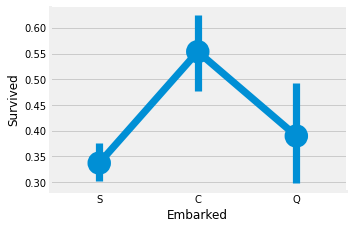

In [24]:
#gcf는 get current figure의 약어
sns.factorplot('Embarked', 'Survived', data=data)
# fig=plt.gcf(): 이미지 저장 선언 -> 선언 안 해주니까 fig.set_size_inches(5, 3)이게 안 먹히는 거 같다
#사이즈 옆으로 안 늘려도 볼만하다
fig=plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

포트 C의 생존 확률은 0.55 정도로 가장 높고 S의 생존 확률 0.35 보다 낮으며 가장 낮다.

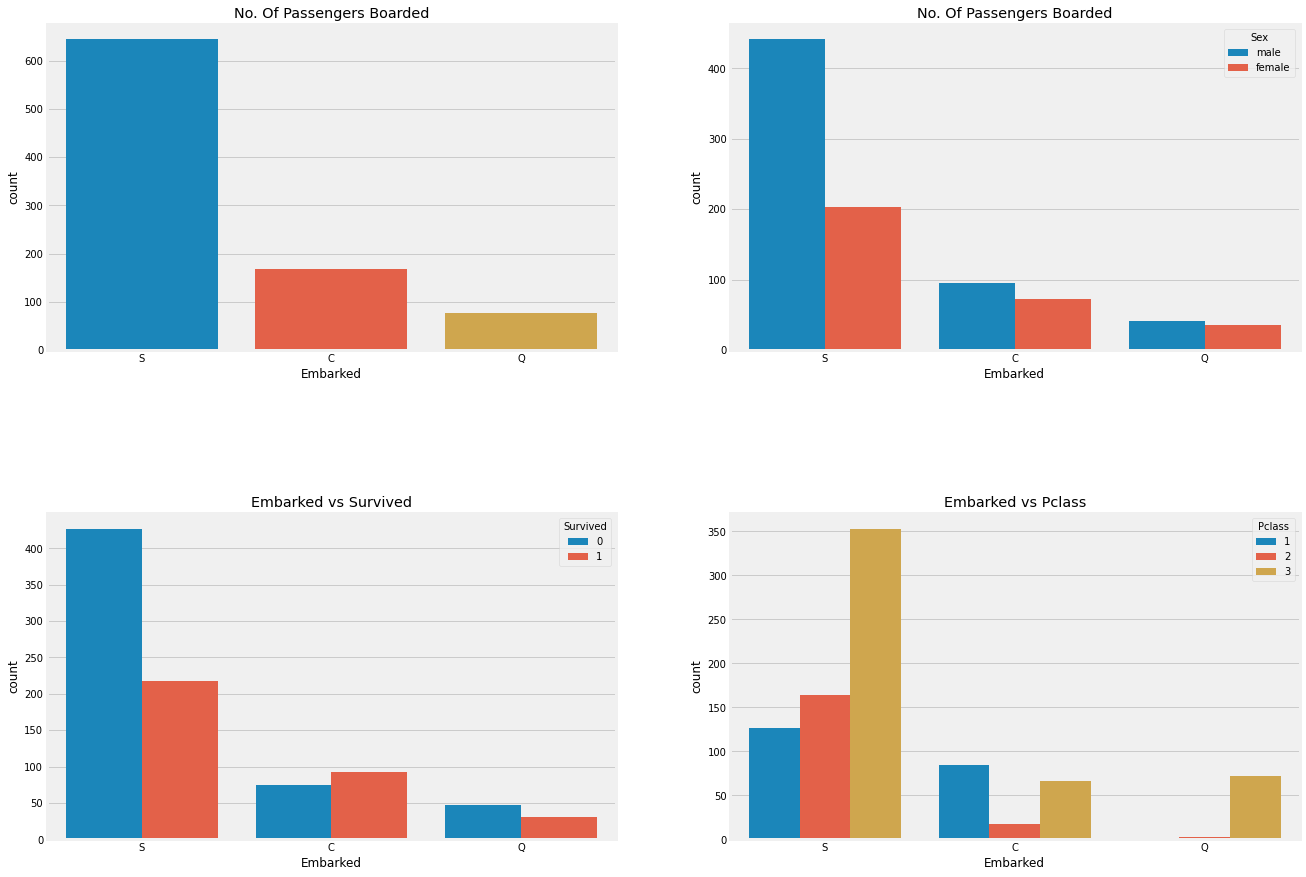

In [25]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue = 'Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

#subplots_adjust: 현재 배치되어 있는 subplot들의 위치를 직접 조정
#wspace, hspace: 서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율 조절

plt.subplots_adjust(wspace = 0.2, hspace=0.5)
plt.show()


관측치:

* 세 탑승구 중에서 가장 탑승객이 많았던 탑승구는 S이고 그 중 많은 수가 Pclass3 사용 승객이다.

* 탑승구 C를 사용한 승객들 중 반 이상이 살아남았다. 이것은 아마 비싼 요금을 낸 Pclass1 이용객들의 구조를 위해서일 것이다.

* 탑승구 S는 가장 좋은 클래스인 Pclass1 이용객의 반 이상이 승선할 때 사용한 탑승구이다. 
P클래스3의 승객 중 81% 정도가 살아남지 못했기 때문에 생존률이 높은 Pclass1 승객의 반 이상이 탔어도 탑승구 S의 생존률은 낮다.(85+2+127 중 127명이 S로 탑승)

* 탑승구 Q를 통해 승선한 사용객 중 거의 95%가 Pclass3이다. -> 생존률 낮겠네

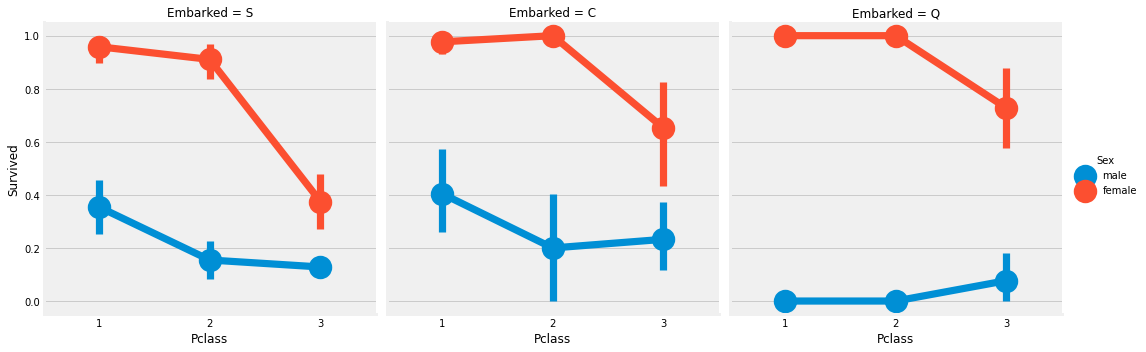

In [26]:
#오... 한 플롯에 데이터가 네 개나 들어있네
#Embarked 컬럼을 들고와서, 그 안의 value대로 나눠, x엔 Pclass, y엔 Survived를 넣고
#성별에 따라 그래프를 두 가지로 분리하여 나타냄
sns.factorplot('Pclass', 'Survived', hue='Sex', col = 'Embarked', data=data)
plt.show()

관측치:

* Pclass1과 Pclass2에서 여성의 생존 확률은 클래스에 상관없이 거의 1임.

* Pclass3 승객들은 남녀 모두 생존율이 매우 낮다.

* 위에서 말했듯 탑승구 Q의 대다수의 탑승객들이 Pclass3이기 때문에(95%정도/남성 38명 중 36이 3클래스) 클래스에 상관없이 생존률이 높은 여성에 비해 남성들의 생존률이 처참하다. 원래도 남성의 생존률이 여성보다 낮은데, 클래스 세 개 중 가장 생존률이 낮은 3클래스의 남성들이 대부분 탔기 때문에 생존률이 저조하다.

## Filling Embarked NaN

총 승객중 많은 승객이 포트 S에서 탑승하니까 Embarked 컬럼의 NaN을 S로 교체하자.

In [27]:
#inplace=True로 하면 df_train에 fillna를 실제로 적용하게 된다(null인 곳을 S로 채우게 된다).
data['Embarked'].fillna('S', inplace = True)

In [28]:
data.Embarked.isnull().any() #Finally No NaN values

False

fillna하고 나서 빈데이터 있나 없나 보니까 False가 나왔다. 빈데이터가 없나보다.

## SibSip-->Discrete Feature

이 feature는 한 개인이 혼자 탑승 했는지 아니면 가족과 함께 탑승 했는지 나타낸다.

Sibling = 형제, 자매, 의붓동생, 의붓언니

Spouse = 남편, 아내

In [29]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


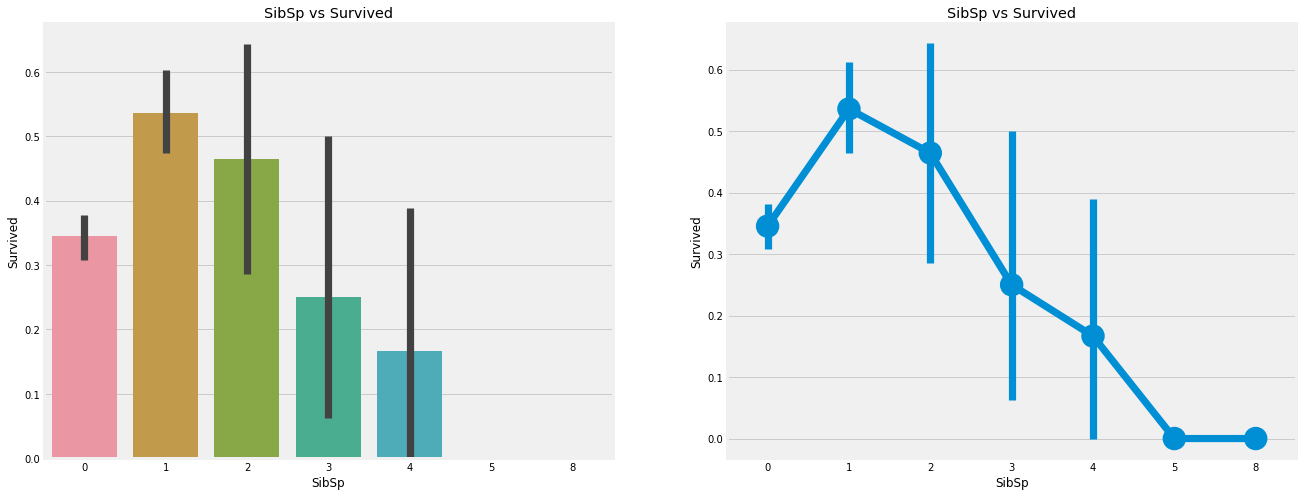

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

#plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


크로스탭은 구성원이 많은 가족들이 Pclass3를 사용했다는 것을 보여준다.

관측치:

바플롯이나 포인트플롯을 보면 승객이 형제 없이 혼자 탑승한 경우 생존율이 35% 정도이다

형제자매의 수가 증가하면 그래프는 대략적으로 감소한다.

4~8인 가족의 생존율은 0%이다. 그 이유는 크로스탭을 보면 알 수 있는데, 4인 이상의 가족들 모두가 전체적인 생존률이 낮은 Pclass3을 이용했기 때문이다.

## Parch 부모자식


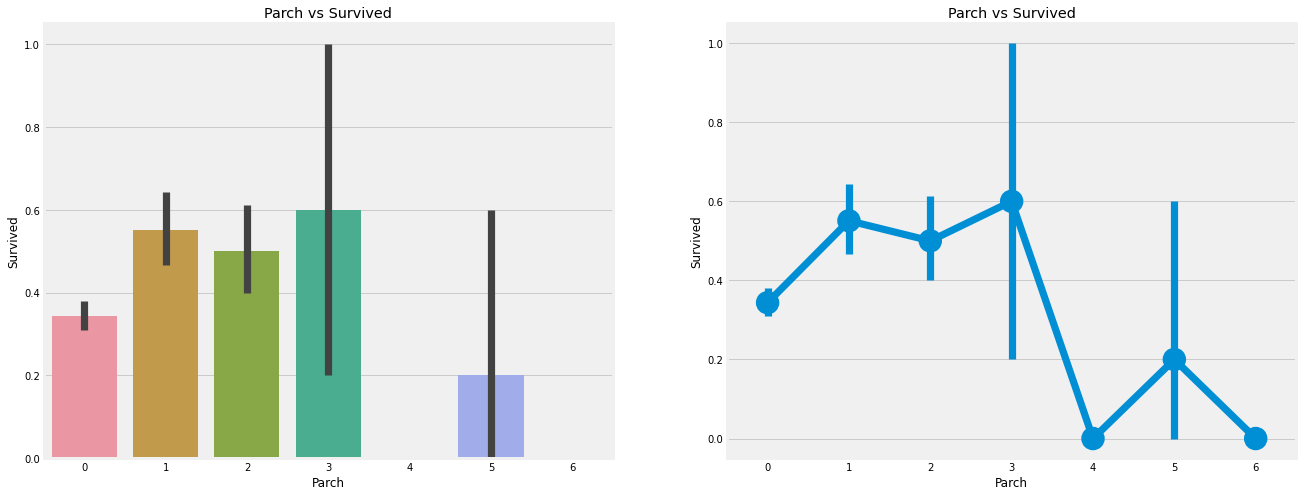

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

관측치:

부모 자식을 태운 승객은 생존 가능성이 높다. 하지만 숫자가 올라갈수록 생존률은 줄어든다.

1-3명의 부모, 자식을 둔 사람의 생존률이 좋다. 

부모 자식이 없는 경우의 생존률을 40%가 안 되며, 4명 이상의 부모자식과 함께 탑승했을 시 생존률이 줄어든다.

# Fare--> Continous Feature

In [33]:
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min())
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.204207968574636


공짜로 탑승한 승객도 존재한다.

Lowest Fare was:  0.0

아마 태어난지 몇 개월 안 된 아기가 아닐까 생각됨.

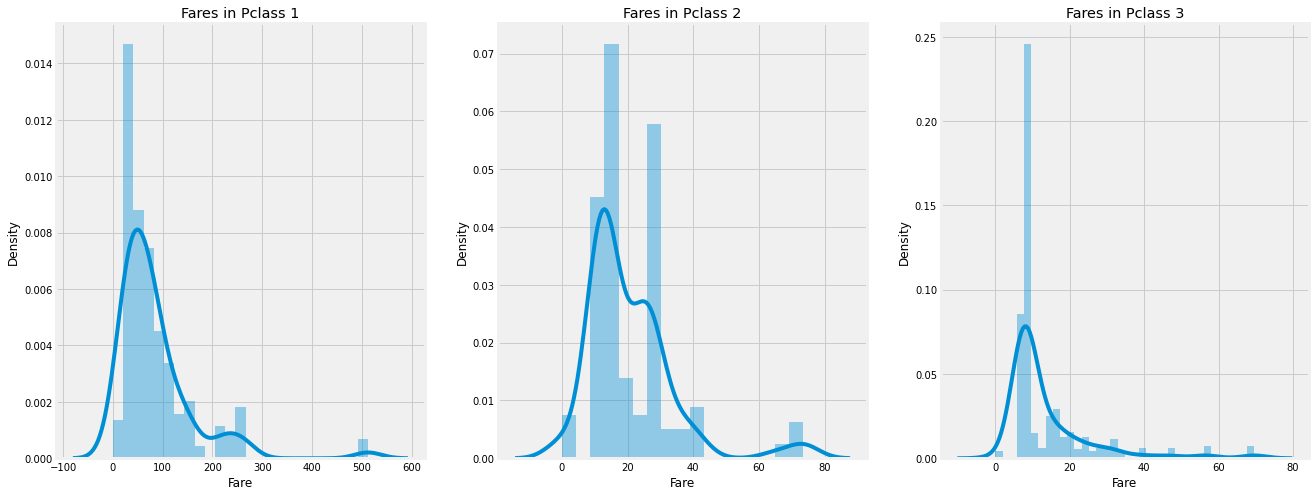

In [34]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

(뭔소리일까)Pclass1 승객의 탑승료 분포가 크게 나타나는 것으로 보이며 이 분포는 탑승료가 감소함에 따라 계속 감소한다. 이것도 연속적이므로 비닝을 사용하여 이산 값으로 변환할 수 있다.

모든 feature에 대한 간략한 관찰:

Sex: 여성의 생존 가능성은 남성에 비해 높다.

Pclass: 1등석 승객이 되면 생존 가능성이 더 높아진다는 경향을 보임. Pclass3의 생존율은 매우 낮다. 여성의 경우 Pclass1의 생존 확률은 거의 1이고 Pclass2의 생존 확률도 높다.

Age: 5-10세 미만의 어린이는 생존 가능성이 높습니다. 15세에서 35세 사이의 승객이 많이 사망했습.

Embarked: Pclass1 승객의 대다수가 S에 올랐음에도 불구하고 C에서 생존할 확률이 더 좋아 보입니다. Q의 승객은 대부분 Pclass3에서 왔다.

Parch+SibSp: 1-2명의 형제자매, 배우자가 탑승하거나 1-3명의 부모, 자식이 있는 경우 혼자이거나 대가족이 함께 여행하는 것보다 생존 가능성이 더 크다.

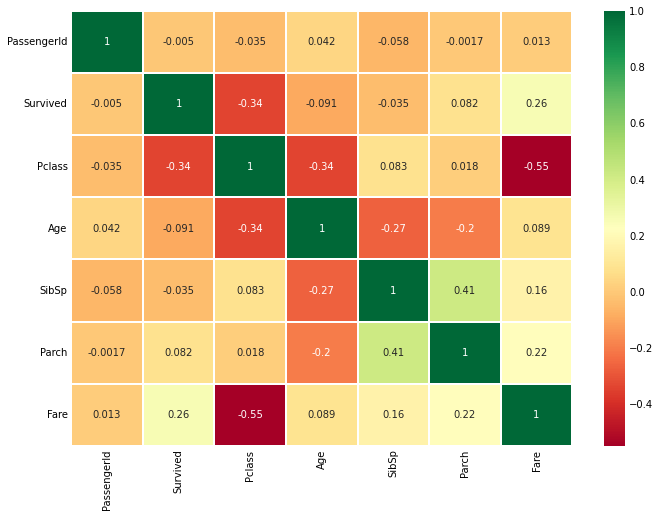

In [35]:
# RdYlGn 이거 숫자 1인 줄 알았는데 영어 l이네
#corr() : 상관계수 계산
#linewidths: 상관계수 블록 사이의 경계선 굵기
#annot: True여야 각 셀의 값을 표기할 수 있음
#cmap :히트 맵 색상을 바꿀 수 있다. summer_r로 지정하면 위에서 봤던 초록 노랑 맵 나올듯
sns.heatmap(data.corr(), annot=True, cmap = 'RdYlGn', linewidths = 0.2) #data.corr()--> correlation matrix 임
fig = plt.gcf() #이걸 저장해 놔야 히트맵 출력 이후에 사이즈 조정이 가능함

#가로 세로 10, 8로 사이즈 조정
fig.set_size_inches(10, 8)
plt.show()

히트맵 해석

가장 먼저 주목해야 할 것은 알파벳이나 문자열 사이의 상관 관계를 알 수 없다는 것이 명백하기 때문에 숫자 기능만 비교된다는 것이다. 플롯을 이해하기 전에 상관관계가 정확히 무엇인지 살펴보자.

양의 상관 관계: 특성 A의 증가가 특성 B의 증가로 이어진다면 양의 상관 관계가 있다. 값 1은 완전한 양의 상관 관계를 의미한다.

음의 상관관계: 특성 A의 증가가 특성 B의 감소로 이어지는 경우, 음의 상관관계가 있다. 값 -1은 완전한 음의 상관 관계를 의미한다.

이제 두 기능이 고도로 또는 완벽하게 상관 관계가 있으므로 하나가 증가하면 다른 특성이 증가한다고 가정해 보겠다. 이는 두 기능이 모두 매우 유사한 정보를 포함하고 있으며 정보의 변동이 거의 또는 전혀 없음을 의미한다. 둘 다 거의 동일한 정보를 포함하므로 이를 다중공선성(MultiColinearity)이라고 한다.

모델을 만들거나 훈련하는 동안 훈련 시간을 요하기 때문에 중복 기능을 제거하는 것이 좋다.

숫자를 보면 위의 히트맵에서 feature들 간의 상관관계가 딱히 없음을 알 수 있다. 가장 높은 상관관계는 SibSp와 Parch 사이, 즉 0.41이다(고작 0.41). 상관관계가 적기 때문에 feature를 제거하지 않고 모든 feature을 계속 사용할 수 있다.

# Part2: Feature Engineering and Data Cleaning

2부: feature engineering 및 데이터 정리

feature engineering이란?

feature가 있는 데이터 세트가 제공될 때마다 모든 feature가 중요할 필요는 없다. 제거해야 할 중복 feature가 많이 있을 수 있다. 또한 다른 feature에서 정보를 관찰하거나 추출하여 새로운 feature를 얻거나 추가할 수 있다.

Name feature를 사용하여 Initial feature를 가져오는 것이 한 예입니다. 새로운 feature를 얻고 몇 가지를 제거할 수 있는지 봅시다. 또한 기존 관련 feature를 Predictive Modeling에 적합한 형식으로 변환합니다.

## Age_band =튜토리얼에선 Age_cat 이었음 카테고리

Problem With Age Feature:

나이는 연속적인 Feature라고 앞서 언급했는데, 머신러닝 모델에서 연속 변수는 사용하기에 문제가 있다.

예:스포츠인을 성별로 그룹화하거나 정렬하라고 하면 쉽게 남성과 여성으로 구분할 수 있다.

이제 연령별로 그룹화하라고 하면 어떻게 해야할까? 30명의 사람이 있는 경우 30개의 연령 값이 있을 수 있다. 이런 게 문제가 된다.

Binning 또는 Normalization을 통해 이러한 연속 값을 범주형 값으로 변환해야 한다. 여기서는 binning을 사용했다. 즉, 연령대 범위를 단일 bin으로 그룹화하거나 단일 값을 할당한다.

승객의 최대 연령은 80세였다. 그러니까 0-80의 범위를 5개의 빈으로 나누자. 따라서 80/5=16이다. 따라서 bin = 16 이다.

In [36]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[(data['Age'] > 64), 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


범주형 값으로 변환이 잘 됐다!

In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap= 'summer') #checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


16~48세 사이의 승객이 많다.

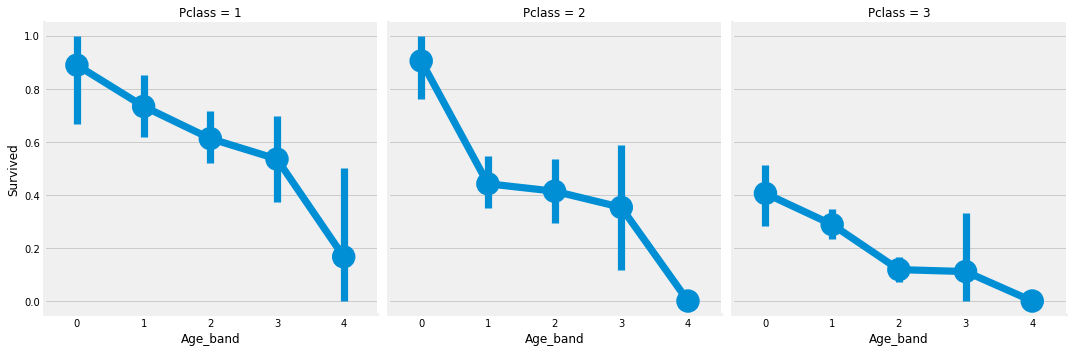

In [38]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

Pclass와 상관없이 연령이 증가할수록 생존율이 감소한다.

## Family_Size and Alone

이 시점에서 "Family_size" 및 "Alone"이라는 새 feature를을 만들고 분석할 수 있다. 이 feature는 Parch와 SibSp의 합이다. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 만들어 사용할 수 있다. Alone은 승객이 혼자인지 여부를 나타낸다.

In [39]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] #family size

#Alone 컬럼 추가하기. 근데 이건 Family_size 컬럼에서 0인 것들을 따로 1의 값으로 지정해서 Alone이라고 저장하는 것
data['Alone'] = 0
data.loc[data.Family_Size == 0,'Alone'] = 1 #Alone

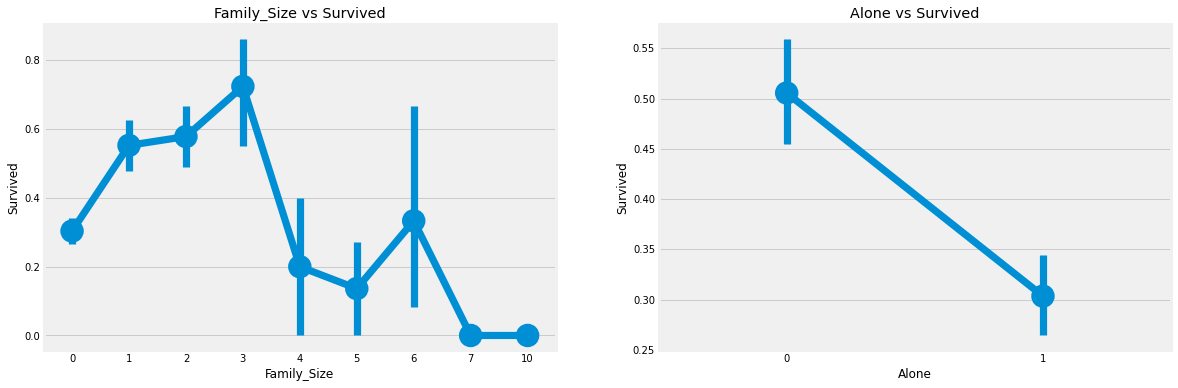

In [40]:
f,ax=plt.subplots(1,2,figsize=(18,6))

sns.pointplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.pointplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

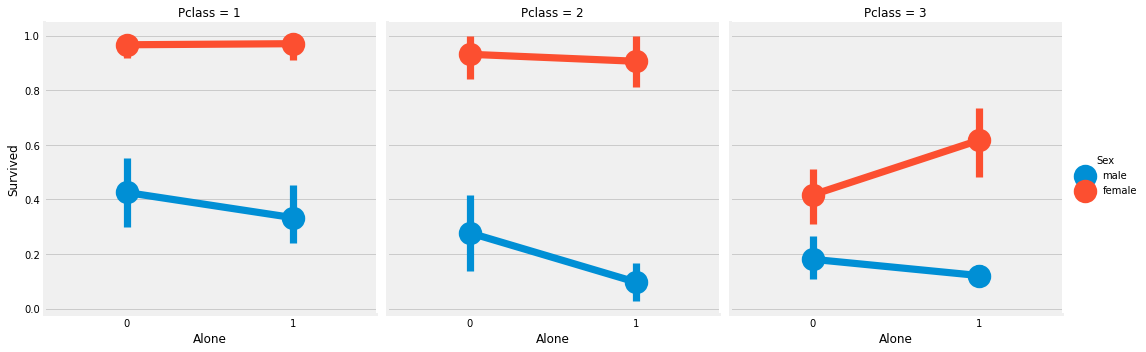

In [41]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

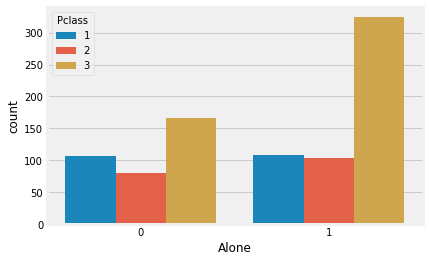

In [42]:
sns.countplot('Alone', hue = 'Pclass', data=data)
plt.show()

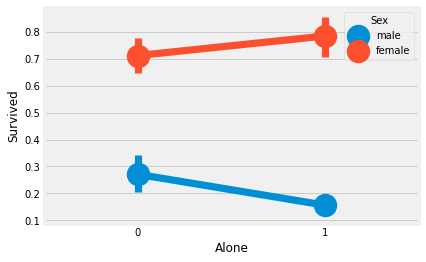

In [43]:
sns.pointplot('Alone', 'Survived', hue='Sex', col = 'Pclass', data=data)
plt.show()

In [44]:
pd.crosstab([data.Sex, data.Alone], [data['Pclass'] == 3, data.Survived], margins=True).style.background_gradient(cmap = 'summer_r')

혼자 있는 것은 Pclass3를 제외하면 성별이나 Pclass에 관계없이 혼자 있는 것이 생존에 좋지 않다는 것을 알 수 있다.(특히 남성의 경우)

## Fare_Range

요금도 연속적인 특성이므로 수치적인 값으로 변환해야 한다. 이를 위해 pandas.qcut을 사용할 것이다.

**qcut이 하는 일**은 우리가 전달한 빈의 수에 따라 **값을 분할하거나 정렬하는 것**이다. 따라서 5개의 빈에 대해 전달하면 5개의 개별 빈 또는 값 범위에 균등한 간격으로 값을 정렬합니다.

In [45]:
#Fare_Range라는 컬럼 추가하는데 Fare컬럼의 값들을 네 등분한 값들로 변환해서 추가하기
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
#요금 범위에 대해서 생존률(생존 0, 1 평균내면 생존률임)알아보기
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


운임범위가 높아질수록 생존 가능성이 높아진다는 것을 분명히 알 수 있다. -> 돈 많이 내면 생존 확률 높아짐

현재 상태로는 Fare_Range 값을 전달할 수 없다. Age_band처럼 숫자화 된 값으로 변환해줘야함

In [46]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] < 513), 'Fare_cat'] = 3

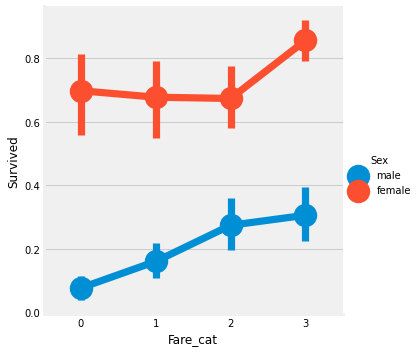

In [47]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

여성은 원래 생존률이 높고, 남성을 보면 Fare_cat이 증가할수록 생존 가능성이 높아진다는 것 알 수 있다. 이 기능은 Sex와 함께 모델링하는 동안 중요한 특징이 될 것이다.

## 문자열 값을 숫자로 변환(Converting String Values into Numeric)

머신러닝 모델에 문자열을 전달할 수 없으므로 Sex, Boarded, Initial feature를 숫자 값으로 변환해야 한다.

In [48]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
data['Embarked'].replace(['S','C', 'Q'], [0, 1, 2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0, 1, 2, 3, 4], inplace = True)

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


### 필요 없는 feature 삭제하자

Name--> 범주형 값으로 변환할 수 없으므로 이름 기능이 필요하지 않다.

Age--> 우리는 에이지_밴드 기능이 있으니, 이것은 필요 없다.

Ticket--> 분류할 수 없는 임의의 문자열이다.

Fare--> Fare_cat 기능이 있으므로 필요하지 않다.

Cabin객실--> NaN 값이 많고 승객도 여러 개의 객실을 가지고 있다. 그래서 이것은 쓸모없다.

Fare_Range--> Fare_cat 기능이 있다.

PassengerId--> 분류할 수 없다.

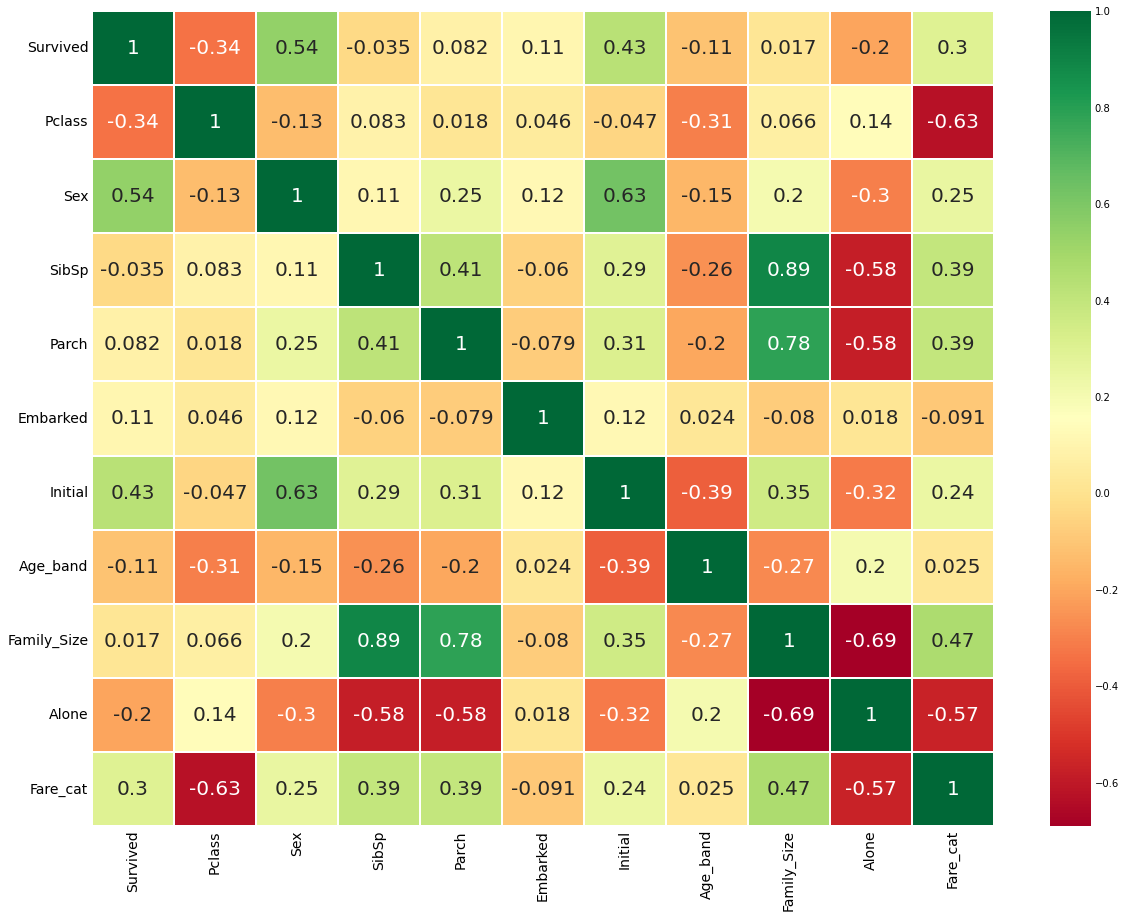

In [50]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace = True)
#annot_kws: 상관계수 글자 크기
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size' : 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)

#x축에 적혀있는 feature 문자들 폰트 사이즈 14
#y도 위와 같은 뜻
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [51]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


drop 전후로 보니까 컬럼들이 잘 삭제 된 것을 알 수 있다!

위의 상관관계도를 보면 양의 숫자를 가지며 연관된 몇 가지 feature를 알 수 있다. 양의 상관관계를 가지는 대표적인 것으로는 SibSp 와 Family_Size, Parch 와 Family_Size가 있고, 음의 상관관계를 가지는 대표적인 것으로는 Alone과 Family_Size가 있다.

# Part 3: 예측 모델링(Predictive Modeling)
우리는 EDA 부분에서 몇 가지 통찰력을 얻었다. 하지만 그것으로는 탑승자가 생존할지 사망할지 정확하게 예측할 수 없다. 훌륭한 분류 알고리즘을 사용하여 승객의 생존 여부를 예측하겠다.모델을 만들기 위해 사용할 알고리즘은 다음과 같다.

1)Logistic Regression

2)Support Vector Machines(Linear and radial)(선형 및 방사형)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

In [52]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #서포트 벡터 머신
from sklearn.ensemble import RandomForestClassifier #랜포
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [53]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

## 방사형 SVM - Radial Support Vector Machines(rbf-SVM)

In [54]:
model = svm.SVC(kernel = 'rbf', C=1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


## 선형 SVM - Linear Support Vector Machine(linear-SVM)

In [55]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


## Logistic Regression

In [56]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is  0.8134328358208955


## Decision Tree

In [57]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is  0.8022388059701493


## K-Nearest Neighbours(KNN)

In [58]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))


The accuracy of the KNN is 0.8134328358208955


n_neighbours K 값을 변경하면 KNN 모델의 정확도가 변경된다. K의 기본값은 5이다. n_neighbours의 다양한 K값에 대한 정확도를 확인해보자.

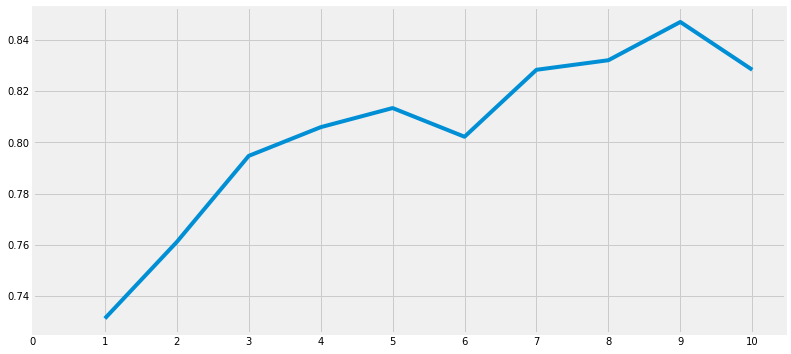

Accuracies for different values of n are:  [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [59]:
a_index =list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are: ', a.values, 'with the max value as ', a.values.max())
    

## Gaussian Naive Bayes

In [60]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


## Random Forests

In [61]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8171641791044776


모델의 정확성만이 분류기의 견고성을 결정하는 유일한 요인은 아니다. 분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되며 90%의 정확도를 기록한다고 가정해보자.

분류기에 매우 좋은 정확도로 보이지만, 새로 출시되는 모든 테스트 세트에 대해 90%가 될 지 장담할 수 있을까? 

그 답은 '아니오'이다. 

그 이유는 분류기 자신을 훈련시키기 위해 어떤 인스턴스를 사용할지 결정할 수 없기 때문인데, 훈련 데이터와 테스트 데이터가 바뀌면 정확도도 달라질 것이 당연하다. 
정확도는 증가하거나 감소할 수 있고, 이를 model variance 라고 한다.

이를 극복하고 일반화된 모델을 얻기 위해 교차 검증Cross Validation을 사용한다.

## 교차 검증Cross Validation

데이터가 불균형한 경우가 많다. 즉, 클래스 1 인스턴스의 수는 많지만 다른 클래스 인스턴스의 수는 적을 수 있다. 따라서 데이터 세트의 각 인스턴스에서 알고리즘을 교육하고 테스트해야 한다. 그런 다음 데이터 세트에 대해 모든 알려진 정확도의 평균을 구할 수 있다.

1) K-폴드 교차 검증은 먼저 데이터 집합을 k-하위 집합으로 나누는 방식으로 작동한다.

2) 데이터 세트를 (k=5)개의 부분으로 나눈다고 가정하자. 그러면 테스트를 위해 1개의 파트를 val 데이터로 놔두고 남은 4개의 파트로 알고리즘을 훈련시킨다.

3) 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 훈련하여 프로세스를 돌린다. 그런 다음 알고리즘의 평균 정확도를 얻기 위해 정확도와 오류를 평균화한다.

  -> 이를 K-폴드 교차 검증이라고 한다.

4) 알고리즘은 일부 훈련 데이터에 대해 데이터 세트를 과소 적합시킬 수 있으며, 때로는 다른 훈련 세트에 대해서도 데이터를 과대 적합시킬 수 있다. 따라서 교차 검증을 통해 우리는 일반화된 모델을 만들 수 있다.

In [62]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits = 10, random_state = 22, shuffle=True) #K=10, split the data into 10 equal parts

xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors = 9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators = 100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.806991,0.044150
Naive Bayes,0.795843,0.054861
Random Forest,0.819363,0.053257


<AxesSubplot:>

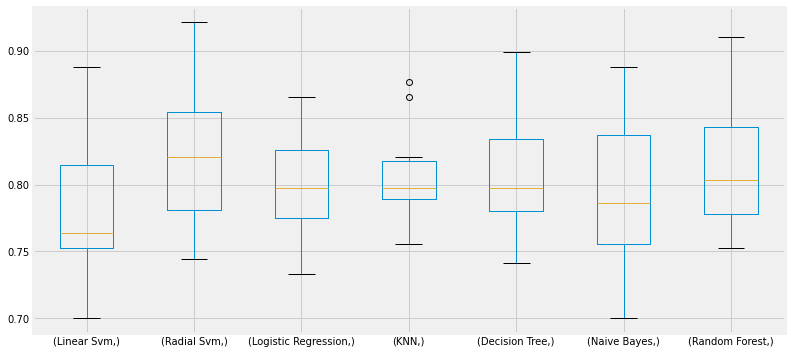

In [63]:
plt.subplots(figsize = (12, 6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

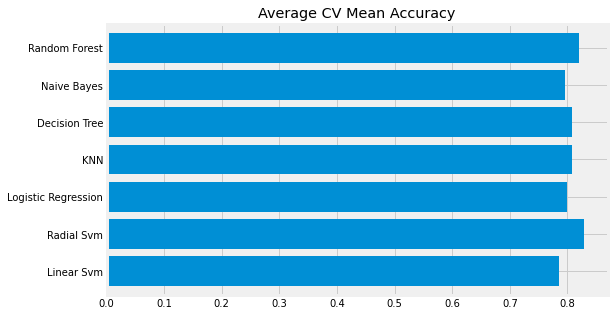

In [64]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()


분류 정확도는 때때로 데이터가 불균형 하면 신뢰하지 못하는 경우가 있다.

이럴 때, confusion matrix의 도움을 받아 요약된 결과를 얻을 수 있는데, 이 매트릭스는 모델이 어디에서 잘못됐는지, 어떤 클래스가 잘못 예측했는지 보여준다.

## Confusion Matrix

분류기가 분류한 정확한 분류와 부정확한 분류의 수를 제공한다.

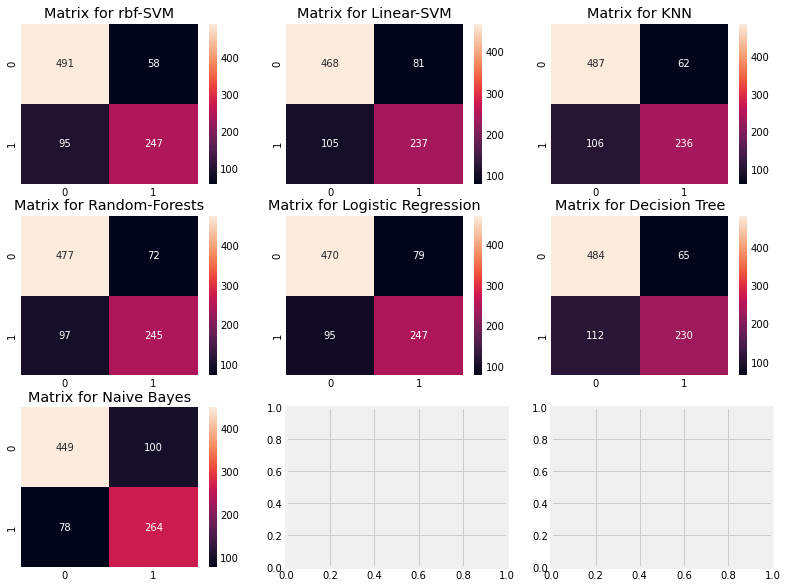

In [65]:
f, ax = plt.subplots(3, 3, figsize = (12, 10))
y_pred = cross_val_predict(svm.SVC(kernel = 'rbf'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt = '2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel ='linear'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt = '2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt= '2.0f')
ax[0, 2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt = '2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt = '2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1, 2],annot=True, fmt = '2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt = '2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

**Confusion Matrix 해석**

왼쪽 대각선은 각 클래스에 대해 수행된 올바른 예측의 수를 나타내고 오른쪽 대각선은 잘못된 예측의 수를 나타낸다. rbf-SVM에 대한 첫 번째 플롯을 살펴보자.

1) 정확한 예측의 수는 491(사망한 경우) + 247(생존한 경우)이며, 평균 CV 정확도는 (491+247)/891 = 82.8%이다.

2) 오류--> 58명의 사망자를 생존자로 잘못 분류했고 95명은 사망자로 분류했다. 그러므로 그것은 생존자를 사망자로 예측함으로써 더 많은 오류를 냈다.

모든 행렬을 보면 rbf-SVM은 죽은 승객을 정확하게 예측할 확률이 높지만 나이브베이즈는 생존자를 정확하게 예측할 확률이 높다고 할 수 있다.

**Hyper-Parameters Tuning하이퍼 파라미터 조정**

머신러닝 모델은 블랙박스와 같다. 이 Black-Box에는 몇 가지 기본 매개 변수 값이 있으며, 더 나은 모델을 얻기 위해 조정하거나 변경할 수 있다. SVM 모델의 C 및 감마처럼, 그리고 서로 다른 분류자에 대해 비슷하게 다른 매개 변수를 하이퍼 파라미터라고 하며, 이를 조정하여 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있다. 이를 초 매개 변수 조정이라고 한다.

SVM과 랜덤 포레스트 등 최고의 2가지 분류기에 대한 하이퍼 매개 변수를 조정한다.

## SVM

In [66]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel' : kernel, 'C' : C, 'gamma' : gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


## Random Forests

In [67]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


The best score for Rbf-Svm is 82.83% with C=0.4 and gamma=0.3. For RandomForest, score is abt 81.93% with n_estimators=300.

## Ensembling

앙상블은 모델의 정확성 또는 성능을 높이는 좋은 방법이다. 간단히 말해서, 그것은 다양한 간단한 모델들이 결합하여 하나의 강력한 모델을 만드는 것이다.

우리가 핸드폰을 구매하고 싶고 다양한 매개 변수들을 바탕으로 많은 사람들에게 문의해보자. 그러면 서로 다른 모든 매개 변수를 분석한 후 단일 제품에 대해 강력한 판단을 내릴 수 있습니다. 이것은 모델의 안정성을 높여주는 앙상블링이다. 앙상블은 다음과 같은 방법으로 수행할 수 있다.

1) Voting Classifier투표 분류기

2) Bagging배깅

3) Boosting.부스팅.

### Voting Classifier투표 분류기

이것은 많은 다른 간단한 기계 학습 모델의 예측을 결합하는 가장 간단한 방법이다. 그것은 모든 서브모델의 예측에 기초한 평균 예측 결과를 제공한다. 서브모델이나 베이스모델은 모두 다양한 종류이다.

In [68]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators = [('KNN', KNeighborsClassifier(n_neighbors = 10)),
                                                 ('RBF', svm.SVC(probability = True, kernel = 'rbf', C = 0.5, gamma = 0.1)),
                                                 ('RFor', RandomForestClassifier(n_estimators = 500, random_state = 0)),
                                                 ('LR', LogisticRegression(C = 0.05)),
                                                 ('DT', DecisionTreeClassifier(random_state = 0)),
                                                 ('NB', GaussianNB()),
                                                 ('svm', svm.SVC(kernel = 'linear', probability = True))], 
                                    voting = 'soft').fit(train_X, train_Y)

print('The accuracy fot ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score is ', cross.mean())

The accuracy fot ensembled model is:  0.8208955223880597
The cross validated score is  0.8249188514357053


### Bagging배깅

배깅은 일반적인 앙상블 방식이다. 데이터 세트의 작은 파티션에 유사한 분류자를 적용한 다음 모든 예측의 평균을 구하는 방식으로 작동한다. 평균화로 인해 분산이 감소한다. 투표 분류기와 달리 배깅은 유사한 분류기를 사용한다.

## Bagged KNN

배깅은 분산이 높은 모형에서 가장 잘 작동한다. 이러한 예로는 의사 결정 트리 또는 임의 포리스트가 있습니다. n_n이웃의 작은 값으로 KNN을 n_neighbours의 작은 값으로 사용할 수 있다.

In [69]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged KNN is: ', result.mean())

The accuracy for bagged KNN is:  0.832089552238806
The cross validated score for bagged KNN is:  0.8104244694132333


## Bagged DecisionTree

In [70]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators = 100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decisiton Tree is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged Decision Tree is: ', result.mean())

The accuracy for bagged Decisiton Tree is:  0.8208955223880597
The cross validated score for bagged Decision Tree is:  0.8171410736579275


## Boosting

부스팅은 분류기의 순차적 학습을 사용하는 앙상블 기법이다. 약한 모델의 단계적 향상입니다.부스팅은 다음과 같이 작동한다.

모델은 먼저 전체 데이터 세트에 대해 교육된다. 이제 모델은 어떤 예시는 맞고 어떤 예시는 틀릴 것이다. 이제 다음 반복에서 학습자는 잘못 예측된 인스턴스에 더 집중하거나 더 많은 비중을 둘 것이다. 따라서 잘못된 인스턴스를 정확하게 예측하려고 할 것이다. 이제 이 반복적인 과정은 연속적이고, 정확도의 한계에 도달할 때까지 새로운 분류기가 모형에 추가된다.

## AdaBoost(Adaptive Boosting)

이 경우 약한 학습자 또는 추정자는 데시온 트리이다. 그러나 dafault base_estimator를 우리가 선택한 어떤 알고리즘으로도 변경할 수 있다.

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8305243445692885


## Stochastic Gradient Boosting

the weak learner는 Decision Tree이다.

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8115230961298376


## XGBoost

In [73]:
import xgboost as xg

xg.set_config(verbosity=0)

xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


AdaBoost의 정확도를 최고로 높였다. 하이퍼 파라미터 튜닝으로 늘려보도록 하자.

## Hyper-Parameter Tuning for AdaBoost

In [74]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate' : learn_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


AdaBoost is 83.05%로 가장 높은 정확도를 얻을 수 있고 이때 사용한 파라미터 값은 n_estimators=100 and learning_rate=0.1 이다.

## Confusion Matrix for the Best Model

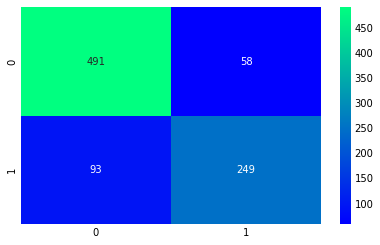

In [75]:
ada = AdaBoostClassifier(n_estimators = 100, random_state = 0, learning_rate = 0.1)
result=cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt = '2.0f')
plt.show()

## Feature Importance

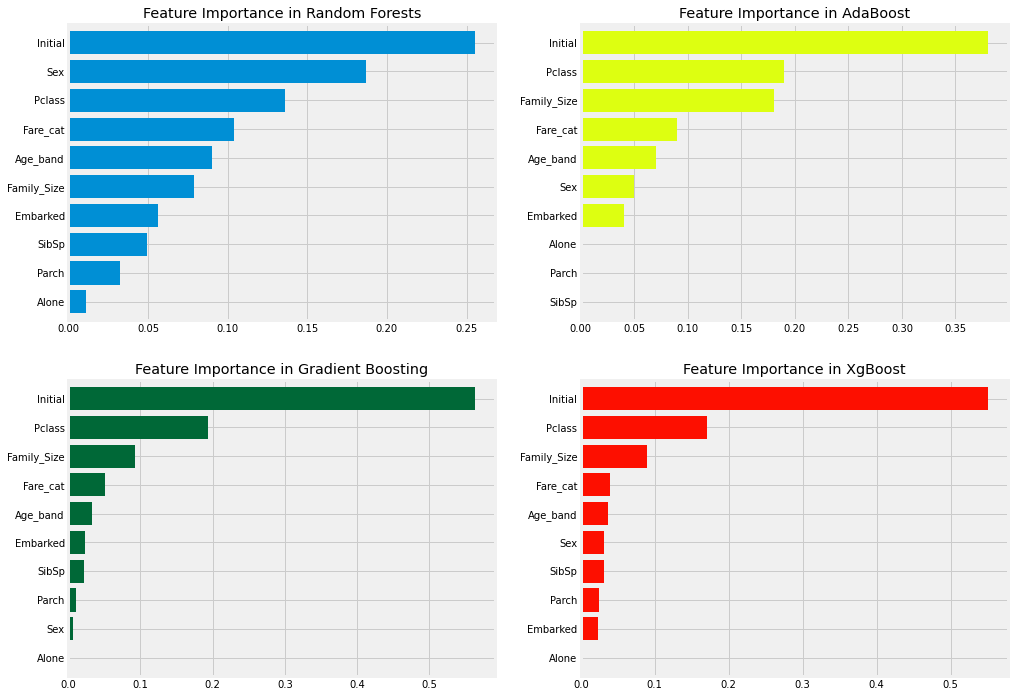

In [76]:
f, ax = plt.subplots(2, 2, figsize = (15, 12))
model = RandomForestClassifier(n_estimators = 300, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_ , X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')
plt.show()

Random Forests, AdaBoost 등과 같은 다양한 분류기의 중요한 특징을 볼 수 있다.

관측치:

1) 일반적으로 중요한 기능으로는 이니셜,Fare_cat,Pclass,Family_Size 등이 있다.

2) Sex feature는 별다른 중요성을 부여하지 않는 것 같은데, Sex와 Pclass가 결합된 것이 매우 좋은 차별화 요소를 주고 있다는 것을 앞서 살펴본 것처럼 충격적이다. Sex는 랜덤 포레스트에서만 중요하게 보인다. 그러나 많은 분류기에서 맨 위에 있는 Initial 기능을 볼 수 있다. 이미 Sex와 Initial의 positive한 상관관계를 보았기 때문에 둘 다 성별을 언급하고 있다.

3) 마찬가지로 Pclass와 Fare_cat은 승객 및 Family_Size with Alone, Parch, SibSp의 상태를 나타낸다.
